# Fraudulent firm classification Part - 1

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Reading the Data

In [2]:
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

# Exploratory Data Analysis of "audit_risk"

In [3]:
audit_risk.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [4]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [5]:
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [7]:
for i in audit_risk:
    print(i)
    print(np.unique(audit_risk[i]))

Sector_score
[ 1.85  1.99  2.34  2.36  2.37  2.72  3.41  3.89 15.56 17.68 21.61 55.57
 59.85]
LOCATION_ID
['1' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38'
 '39' '4' '40' '41' '42' '43' '44' '5' '6' '7' '8' '9' 'LOHARU' 'NUH'
 'SAFIDON']
PARA_A
[0.000e+00 6.000e-04 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02
 6.000e-02 7.000e-02 9.000e-02 1.000e-01 1.100e-01 1.400e-01 1.500e-01
 1.700e-01 1.800e-01 1.900e-01 2.000e-01 2.100e-01 2.300e-01 2.400e-01
 2.500e-01 2.600e-01 2.700e-01 2.800e-01 2.900e-01 3.000e-01 3.100e-01
 3.200e-01 3.300e-01 3.400e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01
 4.000e-01 4.100e-01 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01
 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01
 5.400e-01 5.500e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.100e-01 6.200e-01 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.700e-01
 6.800e-01 6.900e

# Exploratory Data Analysis of "trial"

In [8]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [9]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [10]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [11]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


# Merging audit_risk and trial

In [12]:
trial_d = trial.drop(['Sector_score','PARA_A','SCORE_A','PARA_B','TOTAL','numbers','Money_Value','History','Score','LOCATION_ID','SCORE_B'], axis = 1)


### Risk in both data set have different values, renaming risk in trial as Risk_t

In [13]:
trial_d = trial_d.rename( columns={"Risk": "Risk_t"})

In [14]:
df = pd.concat([audit_risk,trial_d], axis = 1,join_axes=[audit_risk.index])

### EDA on merged Dataset " df "

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [16]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_t
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.5,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526,0.626289
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.0,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869,0.484100
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.5,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.5,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.5,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [17]:
df.shape

(776, 34)

## Removing null Values

In [18]:
df['Money_Value'].median()

0.09

In [19]:
df.replace(np.nan, 0.09, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

### Creating independent and target variables

In [21]:
X = df.drop(['Risk_t','Risk','Audit_Risk','LOCATION_ID'], axis = 1) 

In [22]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,2.4,8.574,0.4,0.5,2,2,2,0,2,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,2.0,2.554,0.4,0.5,2,2,2,0,2,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,2.0,1.548,0.4,0.5,2,2,2,0,2,2
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,4.4,17.530,0.4,0.5,6,6,2,0,2,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,2.0,1.416,0.4,0.5,2,2,2,0,2,2


In [23]:
y = df['Audit_Risk']
y1 = df['Risk_t']

## Feature selection using Chi^2, Lasso, TreeClassifier and Correlation

## Chi^2

[4.092e+03 6.657e+03 2.898e+01 4.431e+03 1.703e+05 4.052e+01 1.046e+05
 1.458e+05 4.271e+00 1.122e+01 9.314e+01 2.331e+05 5.225e+01 1.436e+05
 1.582e+02 1.656e+00 4.815e+01 1.215e+03 1.106e+01 7.798e+02 1.707e+02
 1.282e+05 1.505e+02 3.739e-30 1.122e+02 5.225e+02 1.582e+02 2.564e+02
 1.656e+01 1.106e+02]


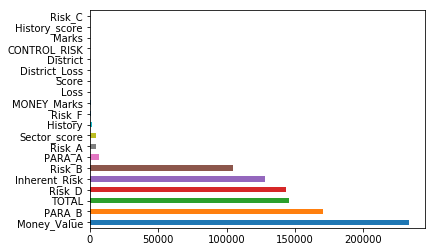

In [24]:
y=y.astype('int')
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
feat_importances = pd.Series(fit.scores_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Lasso

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



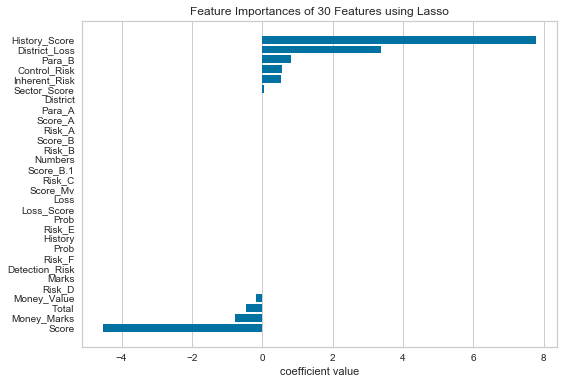

In [25]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

from yellowbrick.features.importances import FeatureImportances

fig = plt.figure()
ax = fig.add_subplot()

labels = list(map(lambda s: s.title(),  X.columns))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

viz.fit(X, y)
viz.poof()

## Extra tree classifier

[0.017 0.031 0.294 0.047 0.004 0.143 0.013 0.023 0.001 0.002 0.001 0.01
 0.051 0.005 0.035 0.004 0.02  0.002 0.    0.001 0.175 0.002 0.019 0.
 0.004 0.035 0.056 0.002 0.002 0.001]


c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



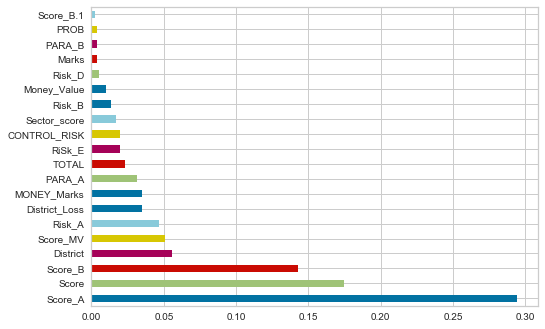

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y1)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Correlation Plot

In [27]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1,-0.216824,-0.425198,-0.219025,-0.13267,-0.218967,-0.130589,-0.153316,-0.15184,-0.170404,-0.166464,-0.117821,-0.31891,-0.116164,-0.108202,-0.0867504,-0.128546,-0.114798,-0.1369,-0.103223,-0.337326,-0.173278,-0.15495,nan,-0.170404,-0.31891,-0.108202,-0.083153,-0.0867504,-0.1369
PARA_A,-0.216824,1,0.49668,0.999267,0.16194,0.35855,0.161834,0.267042,0.133786,0.140648,0.140455,0.449367,0.285991,0.448555,0.127804,0.0437072,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,nan,0.140648,0.285991,0.127804,0.0453931,0.0437072,0.172635
Score_A,-0.425198,0.49668,1,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,0.265983,0.206261,0.478876,0.203678,0.0886623,0.0936475,0.102677,0.177932,0.265322,0.150925,0.720488,0.32092,0.170872,nan,0.274594,0.478876,0.0886623,0.0933447,0.0936475,0.265322
Risk_A,-0.219025,0.999267,0.504878,1,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,0.142708,0.448751,0.290751,0.447913,0.127372,0.0437346,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,nan,0.143103,0.290751,0.127372,0.0458658,0.0437346,0.176159
PARA_B,-0.13267,0.16194,0.249438,0.165287,1,0.347568,0.999936,0.9941,0.209855,0.230851,0.223054,0.125084,0.314548,0.124671,0.0829438,0.0425507,0.0793935,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,nan,0.230851,0.314548,0.0829438,0.0448133,0.0425507,0.316541
Score_B,-0.218967,0.35855,0.572655,0.362971,0.347568,1,0.348152,0.379336,0.277576,0.313798,0.303009,0.205256,0.567591,0.202174,-0.00465439,0.0925665,0.0153245,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,nan,0.313798,0.567591,-0.00465439,0.0988697,0.0925665,0.309505
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1,0.994023,0.209596,0.230547,0.222742,0.125119,0.313089,0.124717,0.0831294,0.0428754,0.0797308,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,nan,0.230547,0.313089,0.0831294,0.0451087,0.0428754,0.316375
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.9941,0.379336,0.994023,1,0.217641,0.238237,0.230697,0.168726,0.337467,0.168233,0.0933415,0.0464705,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,nan,0.238237,0.337467,0.0933415,0.048863,0.0464705,0.326396
numbers,-0.15184,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1,0.90814,0.955304,0.186244,0.446666,0.186568,0.12501,0.0358074,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,nan,0.90814,0.446666,0.12501,-0.00148425,0.0358074,0.209598
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.90814,1,0.990412,0.22041,0.507248,0.220641,0.150369,0.0368989,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,nan,1,0.507248,0.150369,0.00476134,0.0368989,0.248423


### Removing Outliers 

In [28]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_in
result=remove_outlier(df, 'Audit_Risk')

In [29]:
df = result

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      643 non-null float64
LOCATION_ID       643 non-null object
PARA_A            643 non-null float64
Score_A           643 non-null float64
Risk_A            643 non-null float64
PARA_B            643 non-null float64
Score_B           643 non-null float64
Risk_B            643 non-null float64
TOTAL             643 non-null float64
numbers           643 non-null float64
Score_B.1         643 non-null float64
Risk_C            643 non-null float64
Money_Value       643 non-null float64
Score_MV          643 non-null float64
Risk_D            643 non-null float64
District_Loss     643 non-null int64
PROB              643 non-null float64
RiSk_E            643 non-null float64
History           643 non-null int64
Prob              643 non-null float64
Risk_F            643 non-null float64
Score             643 non-null float64
Inherent_Risk     643 non-null float64
CON

## Best features selected

In [31]:
X = df[['District','Money_Value','PARA_A','PARA_B','Score','MONEY_Marks','Sector_score','History','Inherent_Risk']]

In [32]:
X.head()

,District,Money_Value,PARA_A,PARA_B,Score,MONEY_Marks,Sector_score,History,Inherent_Risk
0,2,3.38,4.18,2.50,2.4,2,3.89,0,8.574
1,2,0.94,0.00,4.83,2.0,2,3.89,0,2.554
2,2,0.00,0.51,0.23,2.0,2,3.89,0,1.548
3,2,11.75,0.00,10.80,4.4,6,3.89,0,17.530
4,2,0.00,0.00,0.08,2.0,2,3.89,0,1.416


In [33]:
y = df['Audit_Risk']

## Splitting Test and Train data set for Regression
## Doing feature scaling using Standard scaler
#### Standard scaler is used because we have removed the outliers and minmax scaler might skew the data more.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



## KNN- Regression


In [35]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

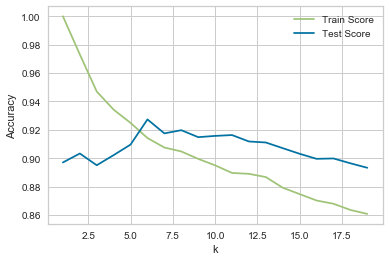

In [36]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Training Accuracy for Linear regression:{:.4f}'.format(lreg.score(X_train, y_train)))
print('Test Accuracy for Linear regression:{:.4f}'.format(lreg.score(X_test, y_test)))

Training Accuracy for Linear regression:0.9368
Test Accuracy for Linear regression:0.9112


## Ridge Regression

In [38]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list1 = []
test_score_list1 = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list1.append(ridge.score(X_train,y_train))
    test_score_list1.append(ridge.score(X_test, y_test))
print('Training Accuracies for ridge regression:',train_score_list1)
print('Test Accuracy for Ridge regression:',test_score_list1)

Training Accuracies for ridge regression: [0.9368148411228485, 0.9368111274554357, 0.9365968916699291, 0.9347652557253715, 0.9256588754859282]
Test Accuracy for Ridge regression: [0.9112650494615576, 0.9116250472636681, 0.9136703105831946, 0.91561311388971, 0.9225855728566679]


<IPython.core.display.Javascript object>


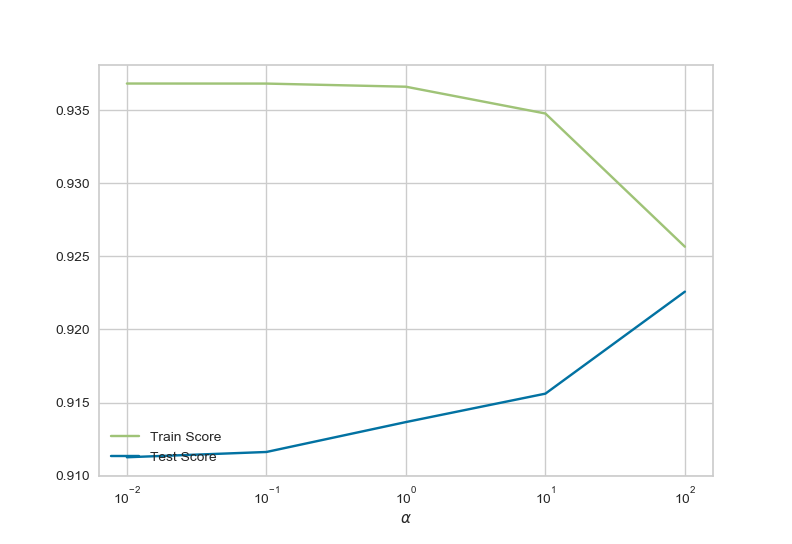

Text(0.5, 0, '$\\alpha$')

In [40]:
%matplotlib notebook
plt.plot(x_range, train_score_list1, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list1, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list2 = []
test_score_list2 = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list2.append(lasso.score(X_train,y_train))
    test_score_list2.append(lasso.score(X_test, y_test))
print('Training Accuracies for Lasso:',train_score_list2)
print('Test Accuracies for Lasso:',test_score_list2)

Training Accuracies for Lasso: [0.9365333936453671, 0.9211791835938014, 0.3644881663561511, 0.0, 0.0]
Test Accuracies for Lasso: [0.9157048605318514, 0.9216108699349554, 0.4063430814553449, -0.007732814108786901, -0.007732814108786901]


<IPython.core.display.Javascript object>


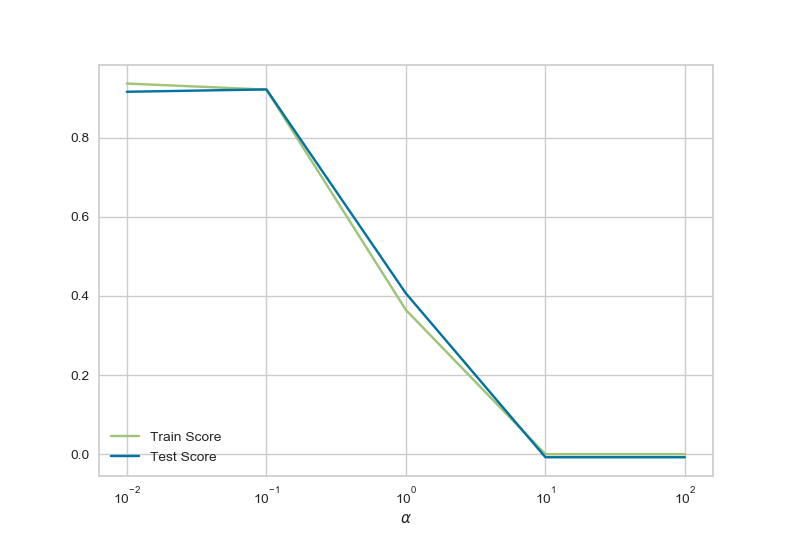

Text(0.5, 0, '$\\alpha$')

In [42]:
%matplotlib notebook
plt.plot(x_range, train_score_list2, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list2, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Feature Selection in Lasso

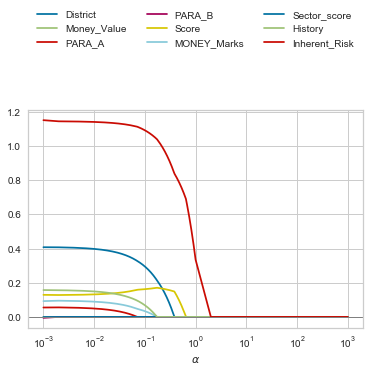

In [43]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)


for i in range(len(X.columns)):
    plt.plot(x_range, coeff[:,i], label = X.columns[i])


plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Polynomial Regression

In [44]:
from  sklearn.preprocessing  import PolynomialFeatures
x_range = [1,2]
train_score_list3 = []
test_score_list3 = []

for n in x_range:
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list3.append(lreg.score(X_train_poly, y_train))
    test_score_list3.append(lreg.score(X_test_poly, y_test))
print(train_score_list3)
print(test_score_list3)

[0.9368148811254665, 0.9757661312146404]
[0.9112223026037848, 0.8467929343139947]


<IPython.core.display.Javascript object>


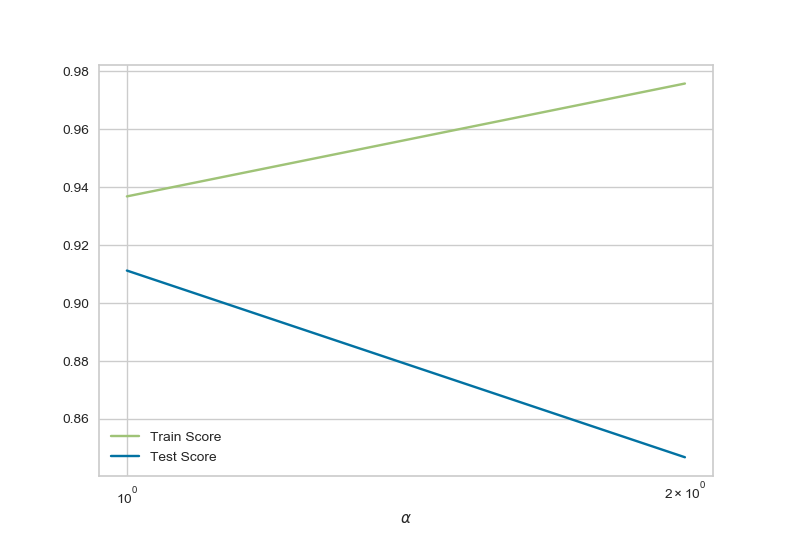

Text(0.5, 0, '$\\alpha$')

In [45]:
%matplotlib notebook
plt.plot(x_range,train_score_list3, c = 'g', label = 'Train Score')
plt.plot(x_range,test_score_list3, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# SVM REGRESSION

## SVM Simple (Kernel = Linear)

In [46]:
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'linear',gamma = 'scale',C=C)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
clf = SVR(**best_parameters)
clf.fit(X_test, y_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on C-validation set: 0.91
Best parameters:  {'C': 100}
Train set score with best parameters: 0.84
Test set score with best parameters: 1.00


## SVM ( Kernel = RBF)

### Using Grid Search and Cross-Validation

In [47]:
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.01, 0.1,1, 10, 100]:
        clf = SVR(kernel = 'rbf',gamma = gamma,C=C)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
clf = SVR(**best_parameters)
clf.fit(X_test, y_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on C-validation set: 0.96
Best parameters:  {'C': 100, 'gamma': 0.01}
Train set score with best parameters: 0.92
Test set score with best parameters: 1.00


## SVM ( Kernel = Poly)

### Using Grid Search and Cross-Validation

In [48]:
from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for epsilon in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'poly',gamma ='scale', epsilon = epsilon,C=C)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'epsilon': epsilon}
clf = SVR(**best_parameters)
clf.fit(X_test, y_test)
test_score = clf.score(X_test, y_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on C-validation set: 0.88
Best parameters:  {'C': 1, 'epsilon': 0.1}
Train set score with best parameters: 0.92
Test set score with best parameters: 0.92


## Best Model is SVM(Kernel = Poly) with C:1 and epsilon:0.1

### Now running above mentioned running on entire data set

In [49]:
df_f = pd.concat([audit_risk,trial_d], axis = 1,join_axes=[audit_risk.index])

In [50]:
df_f.replace(np.nan, 0.09, inplace=True)

In [51]:
Xf = df_f.drop(['Risk_t','Risk','Audit_Risk','LOCATION_ID'], axis = 1) 

In [52]:
Xf.shape

(776, 30)

In [54]:
yf = df_f['Audit_Risk']

In [55]:
yf.shape

(776,)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(Xf,yf, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [57]:
from sklearn.svm import SVR

clf = SVR(kernel = 'poly',gamma ='scale', epsilon = 0.1,C=1.0)
clf.fit(X_test, y_test)
test_score = clf.score(X_test, y_test)
print("Best score on C-validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Train set score with best parameters: {:.2f}".format(train_score))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on C-validation set: 0.88
Best parameters:  {'C': 1, 'epsilon': 0.1}
Train set score with best parameters: 0.92
Test set score with best parameters: 1.00


# Classification

 Decide aboute a good evaluation strategy and justify your choice.
 Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree.
 Which model gives the best results?

In [59]:
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
X = df[['District','Money_Value','PARA_A','PARA_B','Score','MONEY_Marks','Sector_score','History','Inherent_Risk']]

In [60]:
y=df['Risk_t']

In [61]:
sklearn.metrics.confusion_matrix(y,y)

array([[290,   0],
       [  0, 353]], dtype=int64)

There is no class imbalance, so we need not use imbalance methods

We will use RECALL as the metric to assess our classification model as we wawnt to reduce false negative. This is because we would like to reduce any companies that are fraudulent to not be predicted as fraudulent

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [63]:
X_train.shape

(482, 9)

# KNN Classification

In [64]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

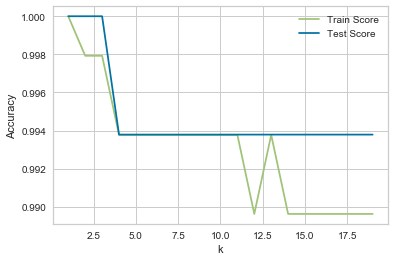

In [65]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [66]:
knn = KNeighborsClassifier(1)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(knn, X, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))
print(scores)

Number of cv iterations:  643
Mean accuracy: 0.99
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 

In [67]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [68]:
pred_knn=knn.predict(X_test)

In [69]:
print(pred_knn)

[0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 1 1 1 0]


# Logistic Regression

In [70]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\skl

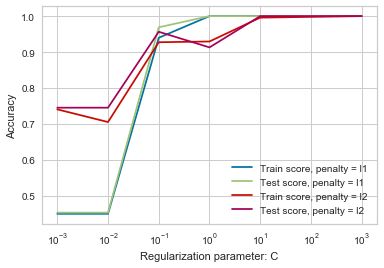

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [72]:
lreg=LogisticRegression(penalty='l2',C=1000)
lreg.fit(X_train,y_train)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
pred_lreg=lreg.predict(X_test)

# Linear Support Vector Machine

In [74]:
import numpy as np
from sklearn.svm import LinearSVC


best_score=0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = LinearSVC(C=C)
    scores = cross_val_score(svm, X_train, y_train, cv=5)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}
            
svm = LinearSVC(**best_parameters)
svm.fit(X_train, y_train)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [75]:
predict_linearsvm = svm.predict(X_test)

<IPython.core.display.Javascript object>


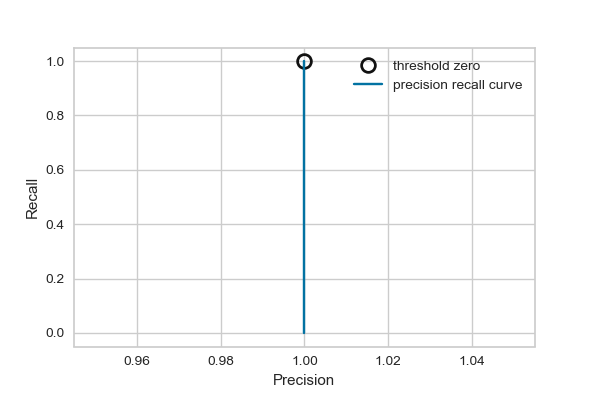

In [77]:
%matplotlib notebook
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svm.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Kernelized Support Vector Machine

# Linear

In [78]:


import numpy as np
from sklearn.svm import SVC


best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel="linear",gamma=gamma, C=C)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
pred_linearkernelsvm=svm.predict(X_test)

<IPython.core.display.Javascript object>


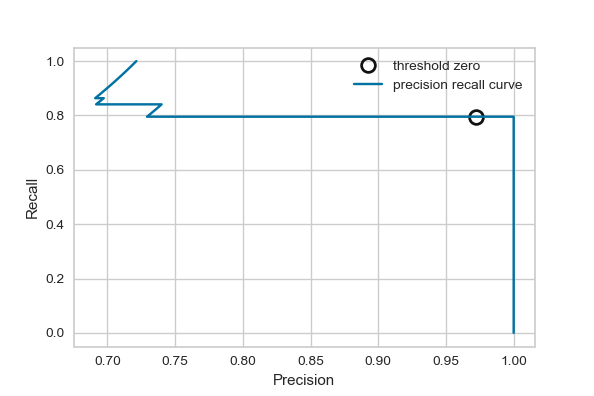

In [80]:
%matplotlib notebook
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svm.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# RBF

In [81]:
from sklearn.svm import SVC
import numpy as np
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel="rbf",gamma=gamma, C=C)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
pred_rbkkernelsvm=svm.predict(X_test)

<IPython.core.display.Javascript object>


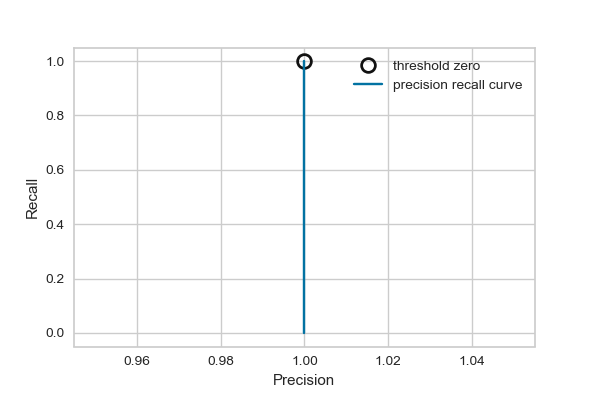

In [83]:
%matplotlib notebook
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svm.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 1.00


In [85]:
np.count_nonzero(pred_knn)

88

In [86]:
from sklearn.metrics import f1_score

print("f1 score KNN: {:.2f}".format(f1_score(y_test, pred_knn)))
print("f1 score SVM with kernel = Linear: {:.2f}".format(f1_score(y_test, pred_linearkernelsvm)))
print("f1 score SVM with kernel = RBF: {:.2f}".format(f1_score(y_test, pred_rbkkernelsvm)))
print("f1 score Linear SVM: {:.2f}".format(f1_score(y_test, predict_linearsvm)))
print("f1 score Logistic Regression: {:.2f}".format(f1_score(y_test, pred_lreg)))
print("f1 score Decision Tree: {:.2f}".format(f1_score(y_test, pred_tree)))

f1 score KNN: 1.00
f1 score SVM with kernel = Linear: 0.88
f1 score SVM with kernel = RBF: 1.00
f1 score Linear SVM: 1.00
f1 score Logistic Regression: 1.00
f1 score Decision Tree: 1.00


In [87]:
from sklearn.metrics import recall_score

print("recall_score score KNN: {:.2f}".format(recall_score(y_test, pred_knn)))
print("recall_score score SVM with kernel = Linear: {:.2f}".format(recall_score(y_test, pred_linearkernelsvm)))
print("recall_score score SVM with kernel = RBF: {:.2f}".format(recall_score(y_test, pred_rbkkernelsvm)))
print("recall_score score Linear SVM: {:.2f}".format(recall_score(y_test, predict_linearsvm)))
print("recall_score score Logistic Regression: {:.2f}".format(recall_score(y_test, pred_lreg)))
print("recall_score score Decision Tree: {:.2f}".format(recall_score(y_test, pred_tree)))

recall_score score KNN: 1.00
recall_score score SVM with kernel = Linear: 0.80
recall_score score SVM with kernel = RBF: 1.00
recall_score score Linear SVM: 1.00
recall_score score Logistic Regression: 1.00
recall_score score Decision Tree: 1.00


Comparing all the scores we see that KNN, SVM with kernel, Linear SVM, Logistic Regression and Decision tree have the best recall_score. We can use any of these models